In [1]:
import pandas as pd
import numpy as np

# Specify the file path
excel_file = 'UOWC_2024_Data.xlsx'

# Specify the sheet name or index you want to read
sheet_name = '0.760Hz'  

df15 = pd.read_excel(excel_file, sheet_name=sheet_name)


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df15


,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m]
0,0.000,-1.067199,0.060890,0.001275,0.000177,0.000281,0.003959,0.0385,9.5,14.0,0.45,0.53,0.01
1,0.005,-0.034240,0.060806,0.001275,0.000177,0.000405,0.003959,NaN,NaN,NaN,NaN,NaN,NaN
2,0.010,-1.325439,0.060750,0.001376,0.000177,0.000281,0.003866,NaN,NaN,NaN,NaN,NaN,NaN
3,0.015,-0.808959,0.060834,0.001426,0.000124,0.000363,0.003959,NaN,NaN,NaN,NaN,NaN,NaN
4,0.020,-0.550720,0.060750,0.001476,0.000177,0.000363,0.004006,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,124.437374,0.063719,0.002281,0.001225,0.000941,-0.005999,NaN,NaN,NaN,NaN,NaN,NaN
11996,59.980,124.953854,0.063663,0.002733,0.001723,0.001105,-0.005952,NaN,NaN,NaN,NaN,NaN,NaN
11997,59.985,126.503293,0.063327,0.003286,0.002169,0.001476,-0.005765,NaN,NaN,NaN,NaN,NaN,NaN
11998,59.990,126.245053,0.063355,0.003689,0.002719,0.001724,-0.005719,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df15['Q']=np.sqrt(2*abs(df15['Delta_p [Pa]'])/1.225)*(df15['Delta_p [Pa]']/abs(df15['Delta_p [Pa]']))*0.5*np.pi*(df15['D_orif [m]'].iloc[0]/2)**2
df15['P_pneu']=df15['Q']*df15['Delta_p [Pa]']
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu
0,0.000,-1.067199,0.060890,0.001275,0.000177,0.000281,0.003959,0.0385,9.5,14.0,0.45,0.53,0.01,-0.000052,5.531910e-05
1,0.005,-0.034240,0.060806,0.001275,0.000177,0.000405,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000009,3.179103e-07
2,0.010,-1.325439,0.060750,0.001376,0.000177,0.000281,0.003866,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,7.656786e-05
3,0.015,-0.808959,0.060834,0.001426,0.000124,0.000363,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,3.650875e-05
4,0.020,-0.550720,0.060750,0.001476,0.000177,0.000363,0.004006,NaN,NaN,NaN,NaN,NaN,NaN,-0.000037,2.050702e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,124.437374,0.063719,0.002281,0.001225,0.000941,-0.005999,NaN,NaN,NaN,NaN,NaN,NaN,0.000560,6.965192e-02
11996,59.980,124.953854,0.063663,0.002733,0.001723,0.001105,-0.005952,NaN,NaN,NaN,NaN,NaN,NaN,0.000561,7.008601e-02
11997,59.985,126.503293,0.063327,0.003286,0.002169,0.001476,-0.005765,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.139365e-02
11998,59.990,126.245053,0.063355,0.003689,0.002719,0.001724,-0.005719,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.117515e-02


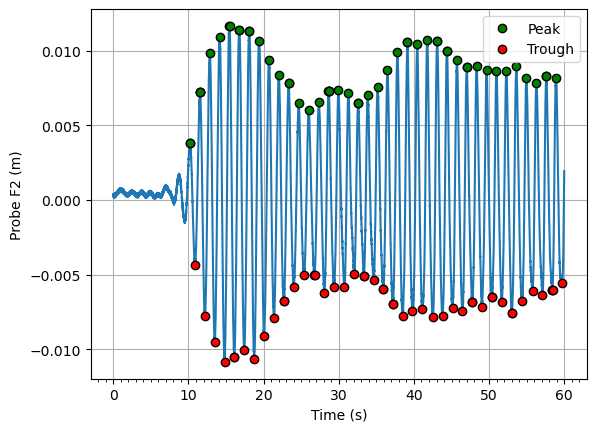

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import find_peaks

#%matplotlib qt
%matplotlib inline

# Create the plot
fig, ax = plt.subplots()
ax.plot(df15['time [s]'], df15['ProbeF2 [m]'])

# Find peaks and troughs
peaks, _ = find_peaks(df15['ProbeF2 [m]'], prominence=0.005) # Adjust prominence threshold as needed
troughs, _ = find_peaks(-df15['ProbeF2 [m]'], prominence=0.005)  # Use negative values to find troughs

# Plot markers for peaks and troughs
ax.plot(df15['time [s]'][peaks], df15['ProbeF2 [m]'][peaks], 'go', label='Peak',markeredgecolor = 'black') 
ax.plot(df15['time [s]'][troughs], df15['ProbeF2 [m]'][troughs], 'ro', label='Trough',markeredgecolor = 'black') 

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F2 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.grid(True)

# Show the legend
ax.legend()


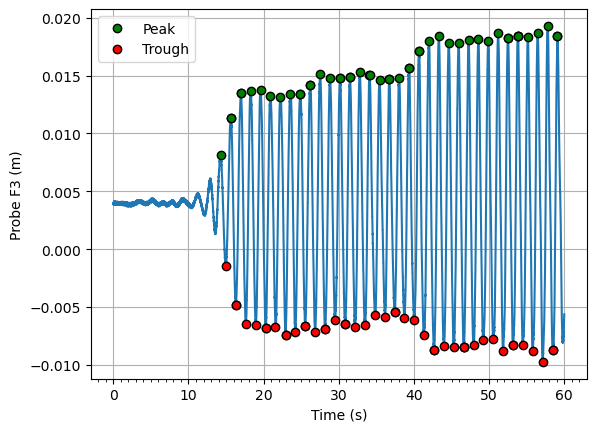

In [6]:
#%matplotlib qt
%matplotlib inline

# Create the plot
fig, ax = plt.subplots()
ax.plot(df15['time [s]'], df15['ProbeF3 [m]'])

# Find peaks and troughs
peaks_, _ = find_peaks(df15['ProbeF3 [m]'], prominence=0.005) # Adjust prominence threshold as needed
troughs_, _ = find_peaks(-df15['ProbeF3 [m]'], prominence=0.005)  # Use negative values to find troughs

# Plot markers for peaks and troughs
ax.plot(df15['time [s]'][peaks_], df15['ProbeF3 [m]'][peaks_], 'go', label='Peak',markeredgecolor = 'black') 
ax.plot(df15['time [s]'][troughs_], df15['ProbeF3 [m]'][troughs_], 'ro', label='Trough',markeredgecolor = 'black') 

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F3 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.grid(True)

# Show the legend
ax.legend()

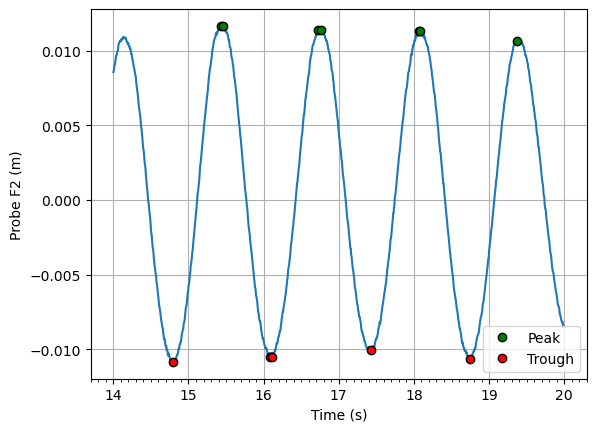

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import find_peaks

# Define the time range
start_time_probe_f2 = 14
end_time_probe_f2 = 20

# Create the plot
fig, ax = plt.subplots()

# Filter ProbeC2 data corresponding to the calculated time range
probe_f2_data = df15[(df15['time [s]'] >= start_time_probe_f2) & (df15['time [s]'] <= end_time_probe_f2)]

# Find peaks and troughs
peaks_f2, _ = find_peaks(probe_f2_data['ProbeF2 [m]'], prominence=0.01) # Adjust prominence threshold as needed
troughs_f2, _ = find_peaks(-probe_f2_data['ProbeF2 [m]'], prominence=0.01)  # Use negative values to find troughs

ax.plot(probe_f2_data['time [s]'], probe_f2_data['ProbeF2 [m]'])

# Plot markers for peaks and troughs
ax.plot(probe_f2_data['time [s]'].iloc[peaks_f2], probe_f2_data['ProbeF2 [m]'].iloc[peaks_f2], 'go', label='Peak', markeredgecolor='black')  
ax.plot(probe_f2_data['time [s]'].iloc[troughs_f2], probe_f2_data['ProbeF2 [m]'].iloc[troughs_f2], 'ro', label='Trough', markeredgecolor='black')  

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F2 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax.grid(True)

# Show the legend
ax.legend()


In [8]:
import numpy as np

# Find nearest trough for each peak
nearest_troughs = []
for peak_idx in peaks_f2:
    nearest_trough_idx = troughs_f2[np.abs(troughs_f2 - peak_idx).argmin()]
    nearest_troughs.append(nearest_trough_idx)

# Calculate amplitudes for each peak-trough pair
amplitudes_f2 = (probe_f2_data['ProbeF2 [m]'].iloc[peaks_f2].values - probe_f2_data['ProbeF2 [m]'].iloc[nearest_troughs].values)/2

# Compute the average amplitude
average_amplitude_f2 = np.mean(amplitudes_f2)

print("Average amplitude between 22 and 30 seconds:", average_amplitude_f2)

df15['average_amplitude_f2']=average_amplitude_f2

Average amplitude between 22 and 30 seconds: 0.010899015724726875


In [9]:
# Define constants
g=9.81
df15['frequency']=0.76
df15['k0']=(2 * np.pi*df15['frequency'])**2/g
df15['k0h']=df15['k0']*df15['depth [m]']


In [10]:
from scipy.optimize import fsolve

k0h = df15['k0h'].iloc[0]

# Define the function
def equations(kh):
    return kh * np.tanh(kh) - k0h

# Solve the equation using fsolve
kh_solution = fsolve(equations, k0h)
df15['kh'] = kh_solution[0]
print("Solution for kh:", kh_solution)
df15

Solution for kh: [1.23802527]


,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh
0,0.000,-1.067199,0.060890,0.001275,0.000177,0.000281,0.003959,0.0385,9.5,14.0,0.45,0.53,0.01,-0.000052,5.531910e-05,0.010899,0.76,2.324438,1.045997,1.238025
1,0.005,-0.034240,0.060806,0.001275,0.000177,0.000405,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000009,3.179103e-07,0.010899,0.76,2.324438,NaN,1.238025
2,0.010,-1.325439,0.060750,0.001376,0.000177,0.000281,0.003866,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,7.656786e-05,0.010899,0.76,2.324438,NaN,1.238025
3,0.015,-0.808959,0.060834,0.001426,0.000124,0.000363,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,3.650875e-05,0.010899,0.76,2.324438,NaN,1.238025
4,0.020,-0.550720,0.060750,0.001476,0.000177,0.000363,0.004006,NaN,NaN,NaN,NaN,NaN,NaN,-0.000037,2.050702e-05,0.010899,0.76,2.324438,NaN,1.238025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,124.437374,0.063719,0.002281,0.001225,0.000941,-0.005999,NaN,NaN,NaN,NaN,NaN,NaN,0.000560,6.965192e-02,0.010899,0.76,2.324438,NaN,1.238025
11996,59.980,124.953854,0.063663,0.002733,0.001723,0.001105,-0.005952,NaN,NaN,NaN,NaN,NaN,NaN,0.000561,7.008601e-02,0.010899,0.76,2.324438,NaN,1.238025
11997,59.985,126.503293,0.063327,0.003286,0.002169,0.001476,-0.005765,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.139365e-02,0.010899,0.76,2.324438,NaN,1.238025
11998,59.990,126.245053,0.063355,0.003689,0.002719,0.001724,-0.005719,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.117515e-02,0.010899,0.76,2.324438,NaN,1.238025


In [11]:
df15['k']=df15['kh']/df15['depth [m]']
df15['λ']=2*np.pi/df15['k']
df15['λ/h']=df15['λ']/df15['depth [m]']
df15['cp']=2*np.pi*df15['frequency']/(df15['k'])
df15['cg']=(df15['cp']/2)*(1+(2*df15['kh']/np.sinh(2*df15['kh'])))
df15['CtoF2']=(17.35-df15['L_F2 [m]'])/df15['cg']
df15['F2toF3']=(df15['L_F3 [m]']-df15['L_F2 [m]'])/df15['cg']
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh,k,λ,λ/h,cp,cg,CtoF2,F2toF3
0,0.000,-1.067199,0.060890,0.001275,0.000177,0.000281,0.003959,0.0385,9.5,14.0,0.45,0.53,0.01,-0.000052,5.531910e-05,0.010899,0.76,2.324438,1.045997,1.238025,2.751167,2.283825,5.075167,1.735707,1.231753,6.37303,3.653329
1,0.005,-0.034240,0.060806,0.001275,0.000177,0.000405,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000009,3.179103e-07,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.010,-1.325439,0.060750,0.001376,0.000177,0.000281,0.003866,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,7.656786e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.015,-0.808959,0.060834,0.001426,0.000124,0.000363,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,3.650875e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.020,-0.550720,0.060750,0.001476,0.000177,0.000363,0.004006,NaN,NaN,NaN,NaN,NaN,NaN,-0.000037,2.050702e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,124.437374,0.063719,0.002281,0.001225,0.000941,-0.005999,NaN,NaN,NaN,NaN,NaN,NaN,0.000560,6.965192e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,59.980,124.953854,0.063663,0.002733,0.001723,0.001105,-0.005952,NaN,NaN,NaN,NaN,NaN,NaN,0.000561,7.008601e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,59.985,126.503293,0.063327,0.003286,0.002169,0.001476,-0.005765,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.139365e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,59.990,126.245053,0.063355,0.003689,0.002719,0.001724,-0.005719,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.117515e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN


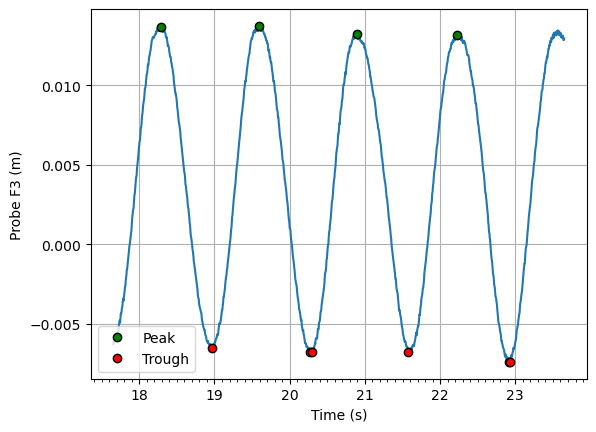

In [12]:
time_difference = df15['F2toF3'].iloc[0]
# Define the time range
start_time_probe_f3 = start_time_probe_f2+time_difference
end_time_probe_f3 = end_time_probe_f2+time_difference

# Create the plot
fig, ax = plt.subplots()

# Filter ProbeC2 data corresponding to the calculated time range
probe_f3_data = df15[(df15['time [s]'] >= start_time_probe_f3) & (df15['time [s]'] <= end_time_probe_f3)]

# Find peaks and troughs
peaks_f3, _ = find_peaks(probe_f3_data['ProbeF3 [m]'], prominence=0.005) # Adjust prominence threshold as needed
troughs_f3, _ = find_peaks(-probe_f3_data['ProbeF3 [m]'], prominence=0.005)  # Use negative values to find troughs

ax.plot(probe_f3_data['time [s]'], probe_f3_data['ProbeF3 [m]'])

# Plot markers for peaks and troughs
ax.plot(probe_f3_data['time [s]'].iloc[peaks_f3], probe_f3_data['ProbeF3 [m]'].iloc[peaks_f3], 'go', label='Peak', markeredgecolor='black')  
ax.plot(probe_f3_data['time [s]'].iloc[troughs_f3], probe_f3_data['ProbeF3 [m]'].iloc[troughs_f3], 'ro', label='Trough', markeredgecolor='black')  

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe F3 (m)')

# Set ticks every 10 seconds
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Set minor ticks every 1 second
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax.grid(True)

# Show the legend
ax.legend()


In [13]:
# Find nearest trough for each peak
nearest_troughs = []
for peak_idx in peaks_f3:
    nearest_trough_idx = troughs_f3[np.abs(troughs_f3 - peak_idx).argmin()]
    nearest_troughs.append(nearest_trough_idx)

# Calculate amplitudes for each peak-trough pair
amplitudes_f3 = (probe_f3_data['ProbeF3 [m]'].iloc[peaks_f3].values - probe_f3_data['ProbeF3 [m]'].iloc[nearest_troughs].values)/2

# Compute the average amplitude
average_amplitude_f3 = np.mean(amplitudes_f3)

print("Average amplitude between 22 and 30 seconds:", average_amplitude_f3)

df15['average_amplitude_f3']=average_amplitude_f3

Average amplitude between 22 and 30 seconds: 0.010045888221782186


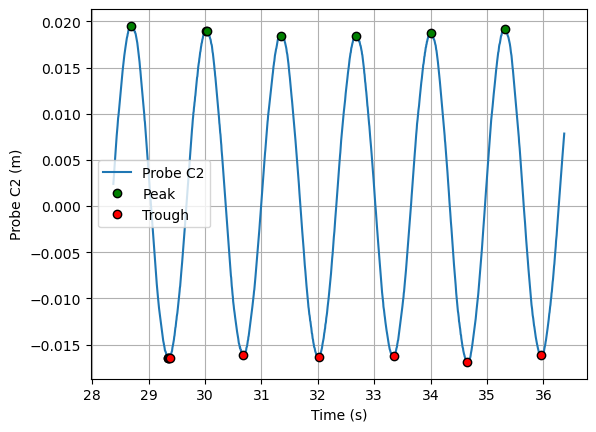

In [14]:
time_difference_c2 = df15['CtoF2'].iloc[0]
start_time_probe_c2 = 22 + time_difference_c2
end_time_probe_c2 = 30 + time_difference_c2

# Filter ProbeC2 data corresponding to the calculated time range
probe_c2_data = df15[(df15['time [s]'] >= start_time_probe_c2) & (df15['time [s]'] <= end_time_probe_c2)]

# Find peaks and troughs for ProbeC2
peaks_c2, _ = find_peaks(probe_c2_data ['ProbeC2 [m]'], prominence=0.001)  # Adjust prominence threshold as needed
troughs_c2, _ = find_peaks(-probe_c2_data ['ProbeC2 [m]'], prominence=0.001)  # Use negative values to find troughs

fig, ax = plt.subplots()

# Plot ProbeC2 values against time
ax.plot(probe_c2_data['time [s]'], probe_c2_data['ProbeC2 [m]'], label='Probe C2')

# Plot markers for peaks and troughs
ax.plot(probe_c2_data['time [s]'].iloc[peaks_c2], probe_c2_data['ProbeC2 [m]'].iloc[peaks_c2], 'go', label='Peak', markeredgecolor='black')
ax.plot(probe_c2_data['time [s]'].iloc[troughs_c2], probe_c2_data['ProbeC2 [m]'].iloc[troughs_c2], 'ro', label='Trough', markeredgecolor='black')

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe C2 (m)')

ax.legend()
ax.grid(True)


In [15]:
# Find nearest trough for each peak
nearest_troughs_c2 = []
for peak_idx in peaks_c2:
    nearest_trough_c2_idx = troughs_c2[np.abs(troughs_c2 - peak_idx).argmin()]
    nearest_troughs_c2.append(nearest_trough_c2_idx)

# Calculate amplitudes of each peak-trough pair for ProbeC2
amplitudes_c2 = (probe_c2_data['ProbeC2 [m]'].iloc[peaks_c2].values - probe_c2_data['ProbeC2 [m]'].iloc[nearest_troughs_c2].values)/2
 
# Compute the average amplitude for ProbeC2
average_amplitude_c2 = np.mean(amplitudes_c2)

print("Average amplitude for ProbeC2 within the time interval:", average_amplitude_c2)
df15['average_amplitude_c2']=average_amplitude_c2

Average amplitude for ProbeC2 within the time interval: 0.01764275785156082


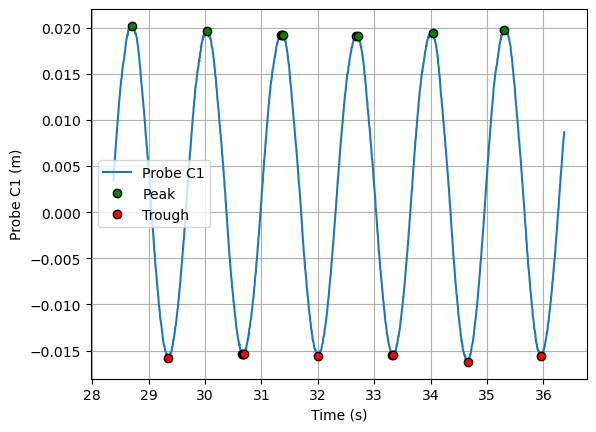

In [16]:


# Find peaks and troughs for ProbeC2
peaks_c1, _ = find_peaks(probe_c2_data ['ProbeC1 [m]'], prominence=0.001)  # Adjust prominence threshold as needed
troughs_c1, _ = find_peaks(-probe_c2_data ['ProbeC1 [m]'], prominence=0.001)  # Use negative values to find troughs

fig, ax = plt.subplots()

# Plot ProbeC2 values against time
ax.plot(probe_c2_data['time [s]'], probe_c2_data['ProbeC1 [m]'], label='Probe C1')

# Plot markers for peaks and troughs
ax.plot(probe_c2_data['time [s]'].iloc[peaks_c1], probe_c2_data['ProbeC1 [m]'].iloc[peaks_c1], 'go', label='Peak', markeredgecolor='black')
ax.plot(probe_c2_data['time [s]'].iloc[troughs_c1], probe_c2_data['ProbeC1 [m]'].iloc[troughs_c1], 'ro', label='Trough', markeredgecolor='black')

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probe C1 (m)')

ax.legend()
ax.grid(True)


In [17]:
# Find nearest trough for each peak
nearest_troughs_c1 = []
for peak_idx in peaks_c1:
    nearest_trough_c1_idx = troughs_c1[np.abs(troughs_c1 - peak_idx).argmin()]
    nearest_troughs_c1.append(nearest_trough_c1_idx)

# Calculate amplitudes of each peak-trough pair for ProbeC2
amplitudes_c1 = (probe_c2_data['ProbeC1 [m]'].iloc[peaks_c1].values - probe_c2_data['ProbeC1 [m]'].iloc[nearest_troughs_c1].values)/2
 
# Compute the average amplitude for ProbeC2
average_amplitude_c1 = np.mean(amplitudes_c1)

print("Average amplitude for ProbeC1 within the time interval:", average_amplitude_c1)
df15['average_amplitude_c1']=average_amplitude_c1

Average amplitude for ProbeC1 within the time interval: 0.01756124732121613


In [18]:
df15['P_pneu_avg']=probe_c2_data['P_pneu'].mean()
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh,k,λ,λ/h,cp,cg,CtoF2,F2toF3,average_amplitude_f3,average_amplitude_c2,average_amplitude_c1,P_pneu_avg
0,0.000,-1.067199,0.060890,0.001275,0.000177,0.000281,0.003959,0.0385,9.5,14.0,0.45,0.53,0.01,-0.000052,5.531910e-05,0.010899,0.76,2.324438,1.045997,1.238025,2.751167,2.283825,5.075167,1.735707,1.231753,6.37303,3.653329,0.010046,0.017643,0.017561,0.037246
1,0.005,-0.034240,0.060806,0.001275,0.000177,0.000405,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000009,3.179103e-07,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246
2,0.010,-1.325439,0.060750,0.001376,0.000177,0.000281,0.003866,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,7.656786e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246
3,0.015,-0.808959,0.060834,0.001426,0.000124,0.000363,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,3.650875e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246
4,0.020,-0.550720,0.060750,0.001476,0.000177,0.000363,0.004006,NaN,NaN,NaN,NaN,NaN,NaN,-0.000037,2.050702e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,124.437374,0.063719,0.002281,0.001225,0.000941,-0.005999,NaN,NaN,NaN,NaN,NaN,NaN,0.000560,6.965192e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246
11996,59.980,124.953854,0.063663,0.002733,0.001723,0.001105,-0.005952,NaN,NaN,NaN,NaN,NaN,NaN,0.000561,7.008601e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246
11997,59.985,126.503293,0.063327,0.003286,0.002169,0.001476,-0.005765,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.139365e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246
11998,59.990,126.245053,0.063355,0.003689,0.002719,0.001724,-0.005719,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.117515e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246


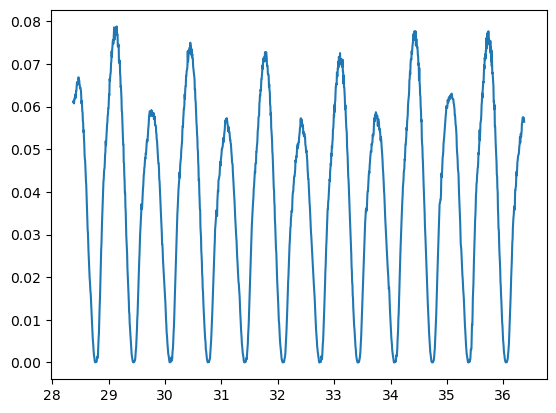

In [19]:
# Plot ProbeC2 values against time
plt.plot(probe_c2_data['time [s]'], probe_c2_data['P_pneu'])

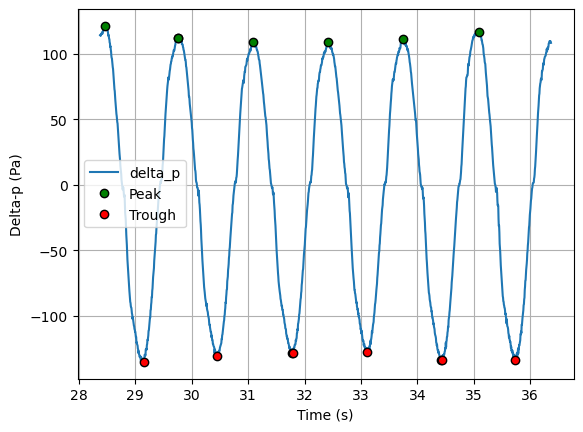

In [20]:
# Find peaks and troughs for ProbeC2
peaks_delta_p, _ = find_peaks(probe_c2_data ['Delta_p [Pa]'], prominence=5)  # Adjust prominence threshold as needed
troughs_delta_p, _ = find_peaks(-probe_c2_data ['Delta_p [Pa]'], prominence=5)  # Use negative values to find troughs

fig, ax = plt.subplots()

# Plot ProbeC2 values against time
ax.plot(probe_c2_data['time [s]'], probe_c2_data['Delta_p [Pa]'], label='delta_p')

# Plot markers for peaks and troughs
ax.plot(probe_c2_data['time [s]'].iloc[peaks_delta_p], probe_c2_data['Delta_p [Pa]'].iloc[peaks_delta_p], 'go', label='Peak', markeredgecolor='black')
ax.plot(probe_c2_data['time [s]'].iloc[troughs_delta_p], probe_c2_data['Delta_p [Pa]'].iloc[troughs_delta_p], 'ro', label='Trough', markeredgecolor='black')

# Set the axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Delta-p (Pa)')

ax.legend()
ax.grid(True)

In [21]:
# Find nearest trough for each peak
nearest_troughs_delta_p = []
for peak_idx in peaks_delta_p:
    nearest_trough_delta_p_idx = troughs_delta_p[np.abs(troughs_delta_p - peak_idx).argmin()]
    nearest_troughs_delta_p.append(nearest_trough_delta_p_idx)

# Calculate amplitudes of each peak-trough pair for ProbeC2
amplitudes_delta_p = (probe_c2_data['Delta_p [Pa]'].iloc[peaks_delta_p].values - probe_c2_data['Delta_p [Pa]'].iloc[nearest_troughs_delta_p].values)/2
 
# Compute the average amplitude for ProbeC2
average_amplitude_delta_p = np.mean(amplitudes_delta_p)

print("Average amplitude for delta_p within the time interval:", average_amplitude_delta_p)
df15['average_amplitude_delta_p']=average_amplitude_delta_p

Average amplitude for delta_p within the time interval: 122.55326043179475


In [22]:
df15['RAO_OWC']=df15['average_amplitude_c1']/df15['average_amplitude_f2']
df15['RAO_delta_p']=df15['average_amplitude_delta_p']/df15['average_amplitude_f2']
df15['Pwave']=df15['cg']*0.5*9.81*1000*df15['average_amplitude_f2']**2
df15['PwaveXwidth']=df15['Pwave']*df15['w_OWC [m]']
df15['CWR']=df15['P_pneu_avg']/df15['PwaveXwidth']
df15

,time [s],Delta_p [Pa],WaveMaker [m],ProbeC1 [m],ProbeC2 [m],ProbeF2 [m],ProbeF3 [m],Himp [m],L_F2 [m],L_F3 [m],depth [m],w_OWC [m],D_orif [m],Q,P_pneu,average_amplitude_f2,frequency,k0,k0h,kh,k,λ,λ/h,cp,cg,CtoF2,F2toF3,average_amplitude_f3,average_amplitude_c2,average_amplitude_c1,P_pneu_avg,average_amplitude_delta_p,RAO_OWC,RAO_delta_p,Pwave,PwaveXwidth,CWR
0,0.000,-1.067199,0.060890,0.001275,0.000177,0.000281,0.003959,0.0385,9.5,14.0,0.45,0.53,0.01,-0.000052,5.531910e-05,0.010899,0.76,2.324438,1.045997,1.238025,2.751167,2.283825,5.075167,1.735707,1.231753,6.37303,3.653329,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,0.717691,0.380376,0.09792
1,0.005,-0.034240,0.060806,0.001275,0.000177,0.000405,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000009,3.179103e-07,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN
2,0.010,-1.325439,0.060750,0.001376,0.000177,0.000281,0.003866,NaN,NaN,NaN,NaN,NaN,NaN,-0.000058,7.656786e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN
3,0.015,-0.808959,0.060834,0.001426,0.000124,0.000363,0.003959,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,3.650875e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN
4,0.020,-0.550720,0.060750,0.001476,0.000177,0.000363,0.004006,NaN,NaN,NaN,NaN,NaN,NaN,-0.000037,2.050702e-05,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,59.975,124.437374,0.063719,0.002281,0.001225,0.000941,-0.005999,NaN,NaN,NaN,NaN,NaN,NaN,0.000560,6.965192e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN
11996,59.980,124.953854,0.063663,0.002733,0.001723,0.001105,-0.005952,NaN,NaN,NaN,NaN,NaN,NaN,0.000561,7.008601e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN
11997,59.985,126.503293,0.063327,0.003286,0.002169,0.001476,-0.005765,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.139365e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN
11998,59.990,126.245053,0.063355,0.003689,0.002719,0.001724,-0.005719,NaN,NaN,NaN,NaN,NaN,NaN,0.000564,7.117515e-02,0.010899,0.76,2.324438,NaN,1.238025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,NaN,NaN,NaN


In [23]:
# Select specific rows and columns from df15
df_result = df15.iloc[[0], [16 ,15, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]

# Assign column names to df_result
df_result.columns = df15.columns[[16 ,15, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
# Reset the index of df_result and drop the previous index
df_result.set_index('frequency', inplace=True)

df_result

,average_amplitude_f2,k0,k0h,kh,k,λ,λ/h,cp,cg,average_amplitude_f3,average_amplitude_c2,average_amplitude_c1,P_pneu_avg,average_amplitude_delta_p,RAO_OWC,RAO_delta_p,Pwave,PwaveXwidth,CWR
frequency,,,,,,,,,,,,,,,,,,,
0.76,0.010899,2.324438,1.045997,1.238025,2.751167,2.283825,5.075167,1.735707,1.231753,0.010046,0.017643,0.017561,0.037246,122.55326,1.611269,11244.433766,0.717691,0.380376,0.09792


In [24]:
import openpyxl

# Load the existing Excel file
file_path = "df_result.xlsx"
wb = openpyxl.load_workbook(file_path)
ws = wb.active

# Find the first empty row in the Excel sheet
empty_row = 1
while ws.cell(row=empty_row, column=1).value is not None:
    empty_row += 1

# Read the index name of the DataFrame
index_value = df_result.index[0]

# Write the index name to the first cell of the empty row
ws.cell(row=empty_row, column=1, value=index_value)

# Write the values of the first row of the DataFrame to the next row of the Excel sheet
for i, value in enumerate(df_result.iloc[0], start=2):
    ws.cell(row=empty_row, column=i, value=value)

# Save the changes to the Excel file
wb.save(file_path)
